In [120]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
#Load data

df_2019 = pd.read_csv('data/mini-lottowyniki 2019.csv', sep=';')
df_2020 = pd.read_csv('data/mini-lottowyniki 2020.csv', sep=';')
df_2021 = pd.read_csv('data/mini-lottowyniki 2021.csv', sep=';')
df_2022 = pd.read_csv('data/mini-lottowyniki 2022.csv', sep=';')

In [109]:
#Mini lotto numbers are from 1 to 42 
# quantity = np.array([np.arange(1,43,1, dtype=int), np.zeros(len(np.arange(1,43,1)))])
# quantity = np.transpose(quantity)

In [136]:
#----------------------2019--------------------------
#Calculating quantity of numbers per column

available_numbers = np.arange(1,43,1)
columns = ['N1', 'N2', 'N3', 'N4', 'N5']

df_all_quantity = pd.DataFrame(available_numbers, columns = ['numbers'])

for column in columns:
    quantity = np.array([np.arange(1,43,1, dtype=int), np.zeros(len(np.arange(1,43,1)))])
    quantity = np.transpose(quantity)
    for i in df_2019[column]:
        for number in available_numbers:
            if i == number:
                quantity[number-1][1] = quantity[number-1][1] + 1 
    df_quantity = pd.DataFrame(quantity, columns = ['numbers', column])  
    df_all_quantity[column] = df_quantity[column]
    
print(df_all_quantity.head(5))

   numbers    N1    N2   N3   N4   N5
0        1  39.0   0.0  0.0  0.0  0.0
1        2  36.0   2.0  0.0  0.0  0.0
2        3  32.0  10.0  1.0  0.0  0.0
3        4  46.0   6.0  0.0  0.0  0.0
4        5  38.0  19.0  4.0  0.0  0.0


In [137]:
#Adding column with sum for all numbers

df_all_quantity['sum_all'] = df_all_quantity['N1'] + df_all_quantity['N2'] + df_all_quantity['N3'] + df_all_quantity['N4'] + df_all_quantity['N5']

In [118]:
#Printing dataframe sorted by descending with sum_all

print(df_all_quantity.sort_values(by=['sum_all'], ascending=False).head(10))

    numbers    N1    N2    N3    N4    N5  sum_all
8         9  14.0  27.0  13.0   2.0   0.0     56.0
19       20   3.0  17.0  18.0  15.0   3.0     56.0
35       36   0.0   1.0   1.0  28.0  25.0     55.0
11       12  13.0  22.0  16.0   2.0   0.0     53.0
41       42   0.0   0.0   0.0   0.0  51.0     51.0
30       31   0.0   0.0  12.0  21.0  18.0     51.0
29       30   0.0   4.0  11.0  24.0  11.0     50.0
12       13  17.0  16.0  15.0   2.0   0.0     50.0
13       14  11.0  26.0  10.0   2.0   0.0     49.0
34       35   0.0   0.0   6.0  20.0  21.0     47.0


Text(0.5, 1.0, 'Quantity of numbers in 2019')

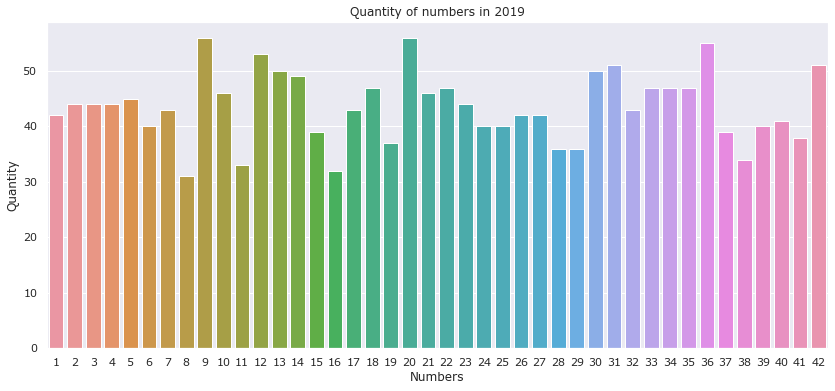

In [132]:
#Visualisation

plt.figure(figsize=(14, 6))
sns.set_style("darkgrid")
sns.set(font="Verdana")
ax = sns.barplot(x='numbers', y="sum_all", data=df_all_quantity)
sns.color_palette()
plt.ylabel("Quantity")
plt.xlabel("Numbers")
plt.title("Quantity of numbers in 2019")

Text(0.5, 1.0, 'Quantity of numbers in 2020')

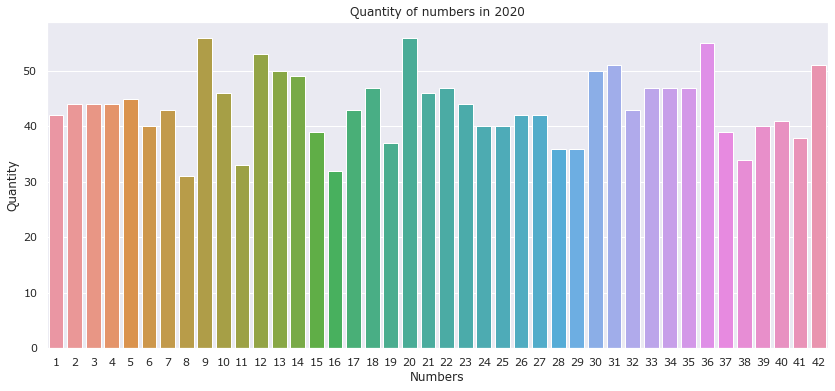

In [138]:
#----------------------2020--------------------------

available_numbers = np.arange(1,43,1)
columns = ['N1', 'N2', 'N3', 'N4', 'N5']

df_all_quantity = pd.DataFrame(available_numbers, columns = ['numbers'])

for column in columns:
    quantity = np.array([np.arange(1,43,1, dtype=int), np.zeros(len(np.arange(1,43,1)))])
    quantity = np.transpose(quantity)
    for i in df_2020[column]:
        for number in available_numbers:
            if i == number:
                quantity[number-1][1] = quantity[number-1][1] + 1 
    df_quantity = pd.DataFrame(quantity, columns = ['numbers', column])  
    df_all_quantity[column] = df_quantity[column]
    
df_all_quantity['sum_all'] = df_all_quantity['N1'] + df_all_quantity['N2'] + df_all_quantity['N3'] + df_all_quantity['N4'] + df_all_quantity['N5']

plt.figure(figsize=(14, 6))
sns.set_style("darkgrid")
sns.set(font="Verdana")
ax = sns.barplot(x='numbers', y="sum_all", data=df_all_quantity)
sns.color_palette()
plt.ylabel("Quantity")
plt.xlabel("Numbers")
plt.title("Quantity of numbers in 2020")

Text(0.5, 1.0, 'Quantity of numbers in 2021')

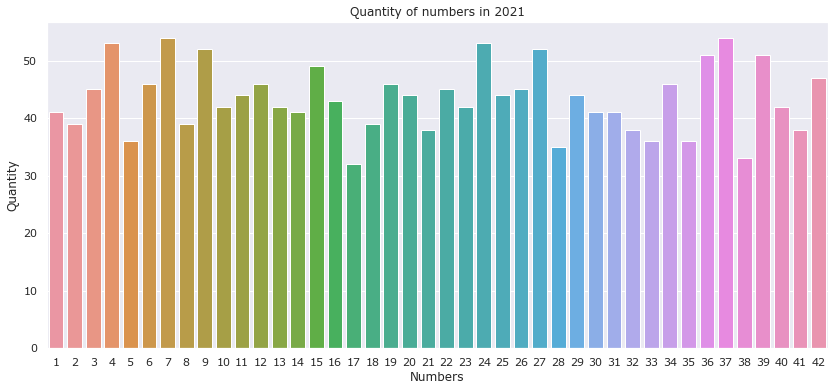

In [142]:
#----------------------2021--------------------------

available_numbers = np.arange(1,43,1)
columns = ['N1', 'N2', 'N3', 'N4', 'N5']

df_all_quantity = pd.DataFrame(available_numbers, columns = ['numbers'])

for column in columns:
    quantity = np.array([np.arange(1,43,1, dtype=int), np.zeros(len(np.arange(1,43,1)))])
    quantity = np.transpose(quantity)
    for i in df_2021[column]:
        for number in available_numbers:
            if i == number:
                quantity[number-1][1] = quantity[number-1][1] + 1 
    df_quantity = pd.DataFrame(quantity, columns = ['numbers', column])  
    df_all_quantity[column] = df_quantity[column]
    
df_all_quantity['sum_all'] = df_all_quantity['N1'] + df_all_quantity['N2'] + df_all_quantity['N3'] + df_all_quantity['N4'] + df_all_quantity['N5']

plt.figure(figsize=(14, 6))
sns.set_style("darkgrid")
sns.set(font="Verdana")
ax = sns.barplot(x='numbers', y="sum_all", data=df_all_quantity)
sns.color_palette()
plt.ylabel("Quantity")
plt.xlabel("Numbers")
plt.title("Quantity of numbers in 2021")

Text(0.5, 1.0, 'Quantity of numbers in 2022')

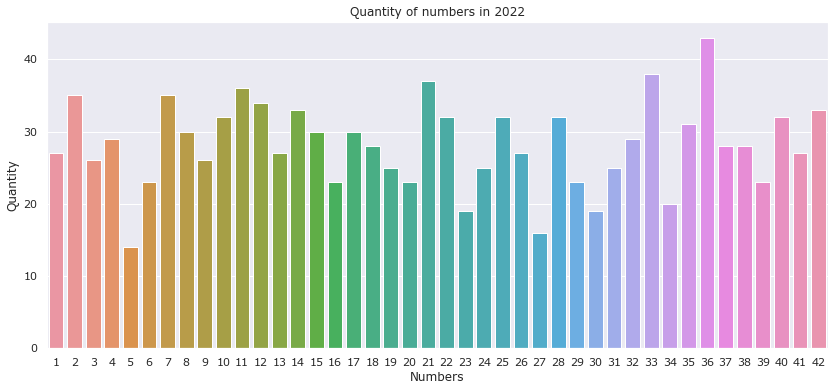

In [141]:
#----------------------2021--------------------------

available_numbers = np.arange(1,43,1)
columns = ['N1', 'N2', 'N3', 'N4', 'N5']

df_all_quantity = pd.DataFrame(available_numbers, columns = ['numbers'])

for column in columns:
    quantity = np.array([np.arange(1,43,1, dtype=int), np.zeros(len(np.arange(1,43,1)))])
    quantity = np.transpose(quantity)
    for i in df_2021[column]:
        for number in available_numbers:
            if i == number:
                quantity[number-1][1] = quantity[number-1][1] + 1 
    df_quantity = pd.DataFrame(quantity, columns = ['numbers', column])  
    df_all_quantity[column] = df_quantity[column]
    
df_all_quantity['sum_all'] = df_all_quantity['N1'] + df_all_quantity['N2'] + df_all_quantity['N3'] + df_all_quantity['N4'] + df_all_quantity['N5']

plt.figure(figsize=(14, 6))
sns.set_style("darkgrid")
sns.set(font="Verdana")
ax = sns.barplot(x='numbers', y="sum_all", data=df_all_quantity)
sns.color_palette()
plt.ylabel("Quantity")
plt.xlabel("Numbers")
plt.title("Quantity of numbers in 2021")